In [184]:
include("../src/vafdyn.jl")
using .VAFDyn

In [2]:
using Plots
gr()

Plots.GRBackend()

In [189]:
params = Dict(
    "ρ"=>1.,
    "μ"=>1.2,
    "N"=>300
)
evolveTime = 59

59

In [215]:
# discrete evolve
dfs = VAFDyn.DFreqspace(params["N"])
@time VAFDyn.evolveVAF(dfs, params, evolveTime, 0.0001)

  1.136789 seconds (4.13 M allocations: 1.459 GiB, 19.54% gc time)


In [235]:
# diffusion evolve 
cfs = VAFDyn.CFreqspace(1001)
@time VAFDyn.evolveVAF(cfs, params, evolveTime, 0.0001)

 16.260045 seconds (14.75 M allocations: 49.304 GiB, 39.69% gc time)


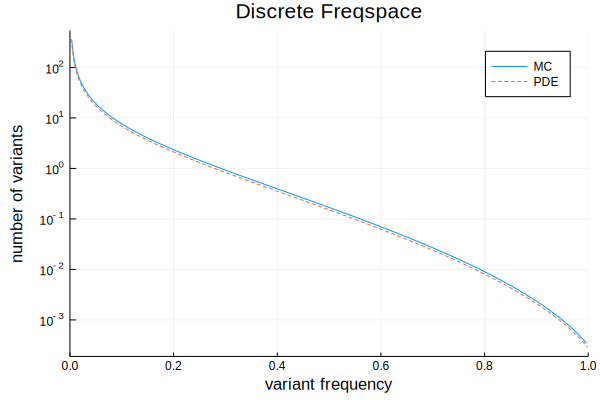

In [236]:
# plotting

h = plot(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1], label="MC", yaxis=:log10)
plot!(cfs.freqs_f[2:end-1], cfs.n_f[2:end-1]/params["N"], linestyle=:dash, label="PDE")
xlims!((0, 1))
# ylims!((10^-4, 10^6))
xlabel!("variant frequency")
ylabel!("number of variants")
title!("Discrete Freqspace")
display(h)